<a href="https://colab.research.google.com/github/sheraphineshovan/CodeClause/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




---


#           **<center>CREDIT CARD FRAUD DETECTION<center>**

---





**About Dataset**

- The Credit Card Fraud Detection dataset is a collection of credit card transactions tagged as fraudulent or legitimate. It encompasses credit card transactions and their associated features, providing valuable insights into detecting fraudulent activities. The dataset serves as the foundation for developing a sophisticated credit card fraud detection model.

**Objective**

- The objective of this project is to construct an advanced credit card fraud detection system that can effectively identify fraudulent transactions from legitimate ones. Leveraging cutting-edge machine learning techniques and algorithms, the aim is to create a robust model that enhances financial security by minimizing unauthorized transactions and protecting users from potential fraud.

**Approach**

1. Load the Data and The Libraries
2. Analyzing the Data
  - Check for null Values
  - Check for imbalance
  - Check for duplicated values
  - Check for skewness
2. Data Preparation and Data Transformation
3. Data Visualization
5. Models
    - Logistic Regression
    - Random Forest
    - Gradient Boostong



### Load the Data and The Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

# Analyzing the Data

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 - No null values

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- Data is imbalanced

In [ ]:
data.duplicated().sum()

1081

- 1081 duplicated values

In [ ]:
data.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

- Large amount of skewness is present

# Data Prepation and Data Transformation

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

- Duplicates values are dropped

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

- User defined function to remove outliers

In [ ]:
low_leadtime,high_leadtime=remove_outlier(data['V28'])
data['V28']=np.where(data['V28']>high_leadtime,high_leadtime,data['V28'])
data['V28']=np.where(data['V28']<low_leadtime,low_leadtime,data['V28'])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(data['V8'])
data['V8']=np.where(data['V8']>high_leadtime,high_leadtime,data['V8'])
data['V8']=np.where(data['V8']<low_leadtime,low_leadtime,data['V8'])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(data['V2'])
data['V2']=np.where(data['V2']>high_leadtime,high_leadtime,data['V2'])
data['V2']=np.where(data['V2']<low_leadtime,low_leadtime,data['V2'])

In [ ]:
low_leadtime,high_leadtime=remove_outlier(data['V23'])
data['V23']=np.where(data['V23']>high_leadtime,high_leadtime,data['V23'])
data['V23']=np.where(data['V23']<low_leadtime,low_leadtime,data['V23'])

In [ ]:
data.skew()

Time      -0.035581
V1        -3.273271
V2        -0.139176
V3        -2.151984
V4         0.671504
V5        -2.414079
V6         1.829880
V7         2.890271
V8         0.151892
V9         0.537663
V10        1.252967
V11        0.344074
V12       -2.199008
V13        0.064293
V14       -1.918804
V15       -0.309659
V16       -1.051161
V17       -3.690497
V18       -0.248661
V19        0.108312
V20       -2.043121
V21        2.820033
V22       -0.182330
V23        0.062001
V24       -0.552129
V25       -0.415744
V26        0.580292
V27       -0.753804
V28       -0.032022
Amount    16.978803
Class     24.430545
dtype: float64

- Outliers are removed

In [ ]:
x = data.drop(['Class'], axis=1)
y = data['Class']

In [ ]:
print(x.shape, y.shape)

(283726, 30) (283726,)


In [ ]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x, y = smt.fit_resample(x, y)

- Using SMOTE to balance the data

In [ ]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
print(x.shape, y.shape)

(566506, 30) (566506,)


- Data is balanced

# Data Visualization

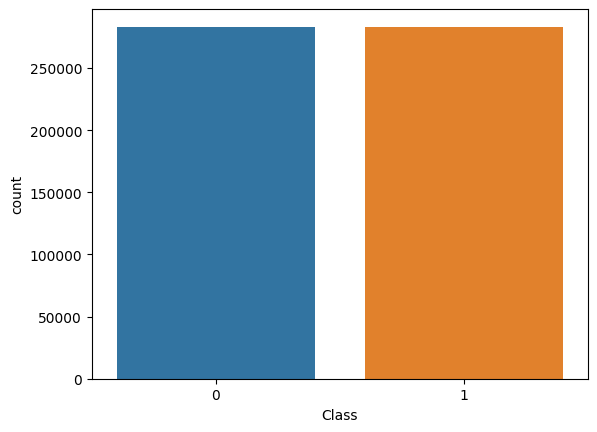

In [ ]:
sns.countplot(x=y)
plt.show()

- Both class are equal

<Axes: xlabel='Time', ylabel='Density'>

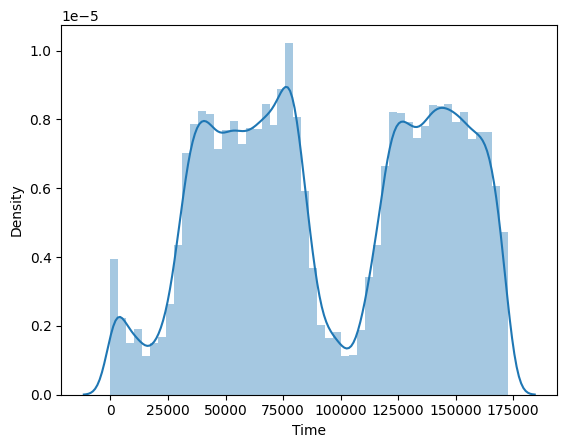

In [ ]:
sns.distplot(data['Time'])

<Axes: ylabel='Amount'>

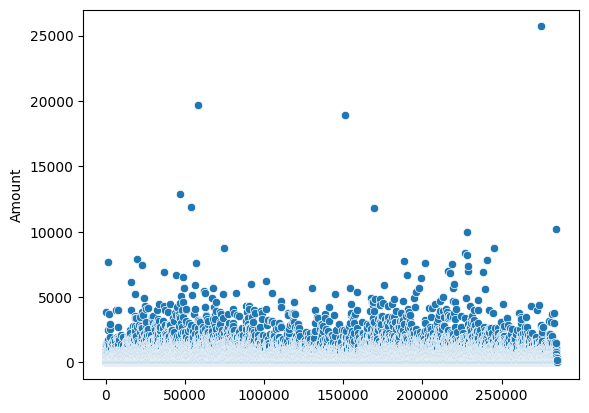

In [ ]:
sns.scatterplot(data["Amount"])

<Axes: ylabel='Class'>

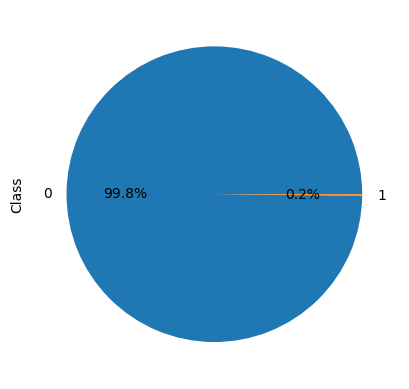

In [ ]:
data["Class"].value_counts().plot(kind='pie',autopct='%1.1f%%')

- 99.8 % data is Non fraud and 0.2% indicates fraud

# Builting Models



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

- Trian and Test Split

In [ ]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)

## Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr=lr.predict(x_train)
preds_ytest_lr=lr.predict(x_test)

In [ ]:
acc_report(y_test,preds_ytest_lr)
acc_report(y_train,preds_ytrain_lr)

accuracy:: 0.96
[[54817  1638]
 [ 3030 53817]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56455
           1       0.97      0.95      0.96     56847

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302

accuracy:: 0.96
[[220087   6711]
 [ 11941 214465]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    226798
           1       0.97      0.95      0.96    226406

    accuracy                           0.96    453204
   macro avg       0.96      0.96      0.96    453204
weighted avg       0.96      0.96      0.96    453204



Inference:
  
  - Train Accuracy and Test Accuracy both 97%
  - Hence the Logistic Regression model performs well for this data

## Random Forest

In [ ]:
rf= RandomForestClassifier(n_estimators=200 ,max_depth=5 ,verbose=1)
rf.fit(x_train,y_train)
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  4.4min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.2s


In [ ]:
acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 0.97
[[225541   1257]
 [ 13606 212800]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    226798
           1       0.99      0.94      0.97    226406

    accuracy                           0.97    453204
   macro avg       0.97      0.97      0.97    453204
weighted avg       0.97      0.97      0.97    453204

accuracy:: 0.97
[[56168   287]
 [ 3443 53404]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     56455
           1       0.99      0.94      0.97     56847

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



Inference:
  
  - Train Accuracy and Test Accuracy both 97%
  - Hence the Random Forest model performs well for this data

## Gradient Boosting

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
preds_gb_train=gb.predict(x_train)
preds_gb_test=gb.predict(x_test)

In [ ]:
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 0.99
[[225483   1315]
 [  4604 221802]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    226798
           1       0.99      0.98      0.99    226406

    accuracy                           0.99    453204
   macro avg       0.99      0.99      0.99    453204
weighted avg       0.99      0.99      0.99    453204

accuracy:: 0.99
[[56133   322]
 [ 1195 55652]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56455
           1       0.99      0.98      0.99     56847

    accuracy                           0.99    113302
   macro avg       0.99      0.99      0.99    113302
weighted avg       0.99      0.99      0.99    113302



Inference:
  
  - Train Accuracy and Test Accuracy both 99%
  - Hence the Random Gradient Boosting model performs well for this data

# Conclusion


  

1. Logistic Regression Model:

  - Train Accuracy and Test Accuracy both 97%
  - The Logistic Regression model demonstrates a commendable consistency in accuracy between training and testing datasets. This implies its capability to generalize well to unseen data, making it a viable option for credit card fraud detection.

2. Random Forest Model:

  - Train Accuracy and Test Accuracy both 97%
  - The Random Forest model showcases stability in accuracy on both training and testing data. This substantiates its reliability in distinguishing between legitimate and fraudulent transactions.

3. Gradient Boosting Model:

  - Train Accuracy and Test Accuracy both 99%
  - The Random Gradient Boosting model outshines the rest with its remarkably high accuracy scores on both datasets. This suggests its strong potential in effectively identifying instances of credit card fraud.

- Comparing all three models **Gradient Boosting** model gives the highest accuracy










